#### Import dependencies & Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
dataset = pd.read_csv('data/rolling_stones_spotify.csv')

### 1. Data Inspection & Exploration

#### 1.1 Preview of the data

In [3]:
dataset.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

#### 1.2 Check the dtypes

In [4]:
dataset.dtypes

Unnamed: 0            int64
name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object

#### 1.3 Description of the Data

In [5]:
dataset.shape

(1610, 18)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [7]:
dataset.describe()

Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
std       0.231253    12.426859  108333.474920  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000

In [8]:
dataset.describe(include='all')

Unnamed: 0                name                       album  \
count   1610.000000                1610                        1610   
unique          NaN                 954                          90   
top             NaN  Brown Sugar - Live  Voodoo Lounge Uncut (Live)   
freq            NaN                  16                          56   
mean     804.500000                 NaN                         NaN   
std      464.911282                 NaN                         NaN   
min        0.000000                 NaN                         NaN   
25%      402.250000                 NaN                         NaN   
50%      804.500000                 NaN                         NaN   
75%     1206.750000                 NaN                         NaN   
max     1609.000000                 NaN                         NaN   

       release_date  track_number                      id  \
count          1610   1610.000000                    1610   
unique           57           NaN                    1610   
top      1972-05-12           NaN  2IEkywLJ4ykbhi1yRQvmsT   
freq             75           NaN                       1   
mean            NaN      8.613665                     NaN   
std             NaN      6.560220                     NaN   
min             NaN      1.000000                     NaN   
25%             NaN      4.000000                     NaN   
50%             NaN      7.000000                     NaN   
75%             NaN     11.000000                     NaN   
max             NaN     47.000000                     NaN   

                                         uri  acousticness  danceability  \
count                                   1610   1610.000000   1610.000000   
unique                                  1610           NaN           NaN   
top     spotify:track:2IEkywLJ4ykbhi1yRQvmsT           NaN           NaN   
freq                                       1           NaN           NaN   
mean                                     NaN      0.250475      0.468860   
std                                      NaN      0.227397      0.141775   
min                                      NaN      0.000009      0.104000   
25%                                      NaN      0.058350      0.362250   
50%                                      NaN      0.183000      0.458000   
75%                                      NaN      0.403750      0.578000   
max                                      NaN      0.994000      0.887000   

             energy  instrumentalness    liveness     loudness  speechiness  \
count   1610.000000       1610.000000  1610.00000  1610.000000  1610.000000   
unique          NaN               NaN         NaN          NaN          NaN   
top             NaN               NaN         NaN          NaN          NaN   
freq            NaN               NaN         NaN          NaN          NaN   
mean       0.792352          0.164170     0.49173    -6.971615     0.069512   
std        0.179886          0.276249     0.34910     2.994003     0.051631   
min        0.141000          0.000000     0.02190   -24.408000     0.023200   
25%        0.674000          0.000219     0.15300    -8.982500     0.036500   
50%        0.848500          0.013750     0.37950    -6.523000     0.051200   
75%        0.945000          0.179000     0.89375    -4.608750     0.086600   
max        0.999000          0.996000     0.99800    -1.014000     0.624000   

              tempo      valence   popularity    duration_ms  
count   1610.000000  1610.000000  1610.000000    1610.000000  
unique          NaN          NaN          NaN            NaN  
top             NaN          NaN          NaN            NaN  
freq            NaN          NaN          NaN            NaN  
mean     126.082033     0.582165    20.788199  257736.488199  
std       29.233483     0.231253    12.426859  108333.474920  
min       46.525000     0.000000     0.000000   21000.000000  
25%      107.390750     0.404250    13.000000  190613.000

#### 1.4 Check for missing values

In [9]:
print("\nMissing Values Per Column:")
print(dataset.isnull().sum())


Missing Values Per Column:
Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


#### Finding Frequency of objects

In [10]:
for col in dataset.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(dataset[col].value_counts())


Value counts for name:
name
Brown Sugar - Live                        16
Honky Tonk Women - Live                   16
Tumbling Dice - Live                      14
Sympathy For The Devil - Live             13
Start Me Up - Live                        12
                                          ..
Low Down - Remastered                      1
Already Over Me - Remastered               1
Gunface - Remastered                       1
You Don't Have To Mean It - Remastered     1
Tell Me - Full Version / Mono Version      1
Name: count, Length: 954, dtype: int64

Value counts for album:
album
Voodoo Lounge Uncut (Live)                                   56
Honk (Deluxe)                                                47
Live Licks                                                   46
Tattoo You (Super Deluxe)                                    46
Some Girls (Deluxe Version)                                  44
                                                             ..
Beggars Banquet (50th 

#### 1.5 Check for Duplicates

In [11]:
# Find duplicate rows
duplicates_ = dataset[dataset.duplicated()]

# Display duplicates, if any
print("Duplicates:\n", duplicates_)

# Remove duplicates, if needed
dataset = dataset.drop_duplicates()

Duplicates:
 Empty DataFrame
Columns: [Unnamed: 0, name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []


#### 1.6 Handle Missing values

In [12]:
# Check for missing values in each column
print(dataset.isnull().sum())

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


#### 1.7 Check for Outliers

In [13]:
numeric_cols = dataset.select_dtypes(include=np.number).columns

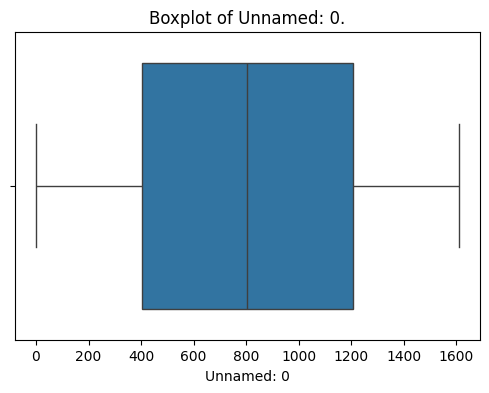

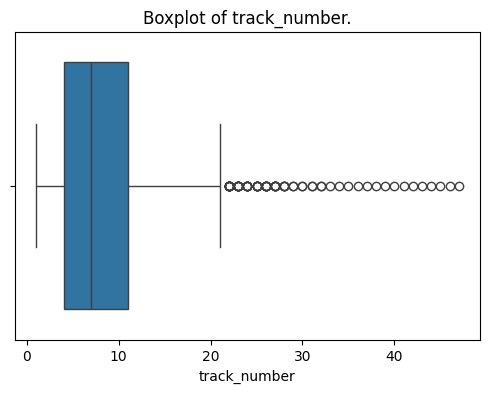

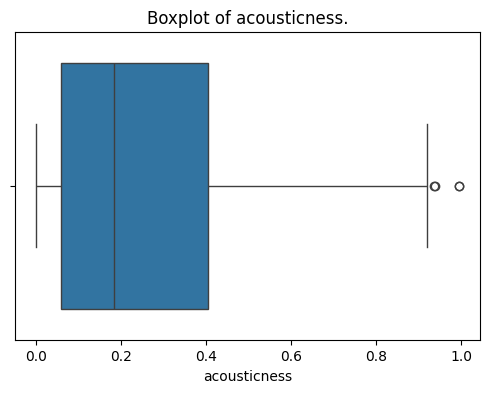

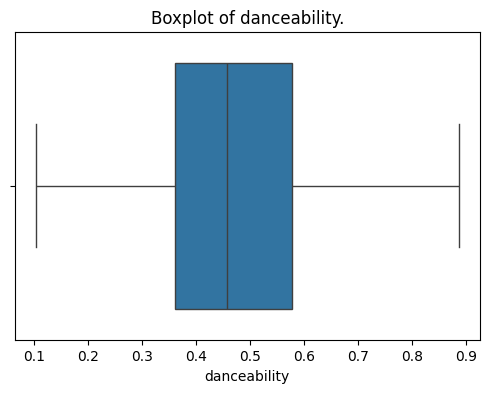

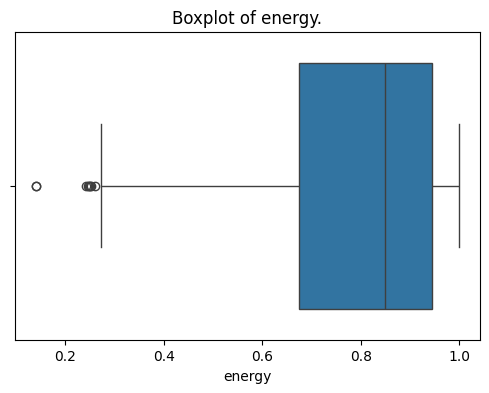

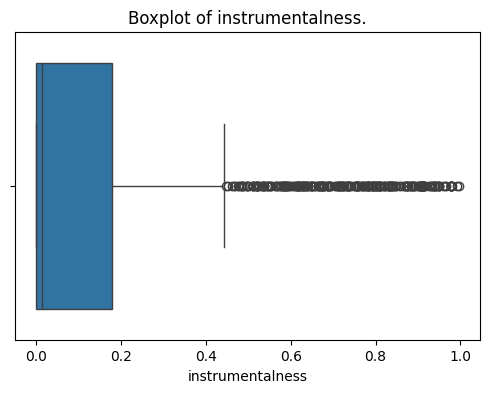

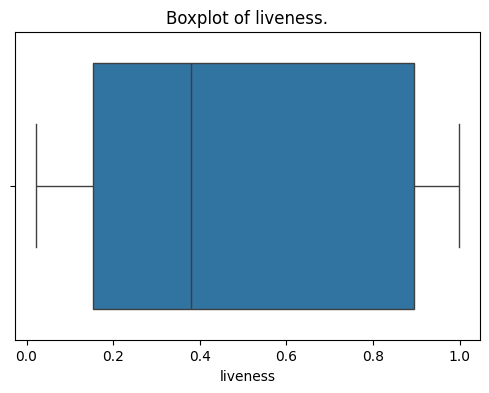

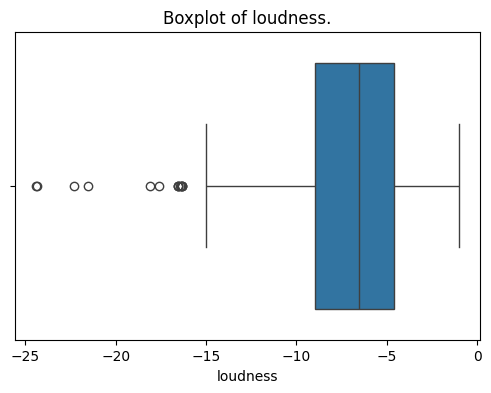

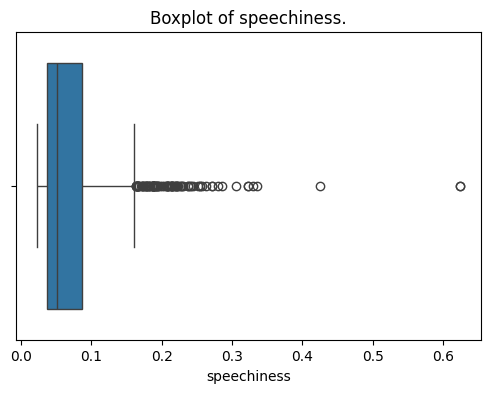

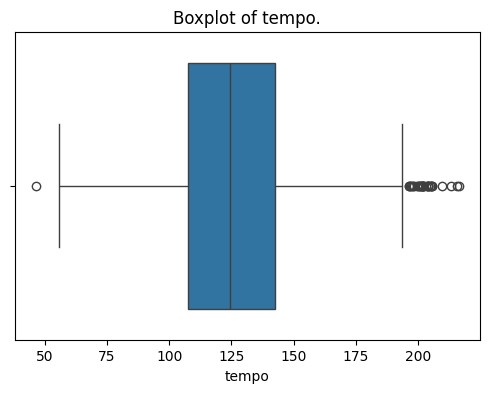

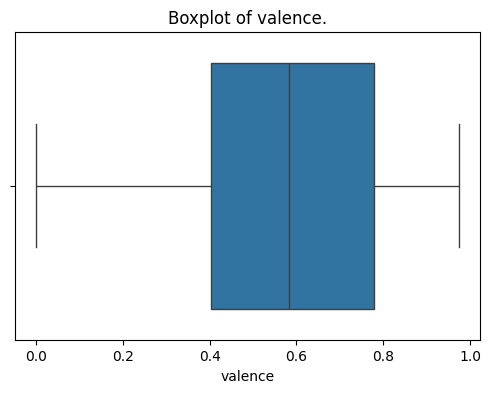

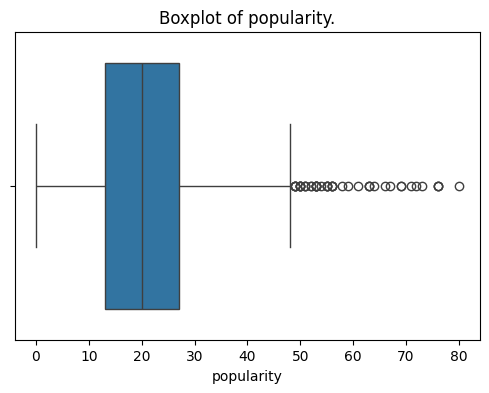

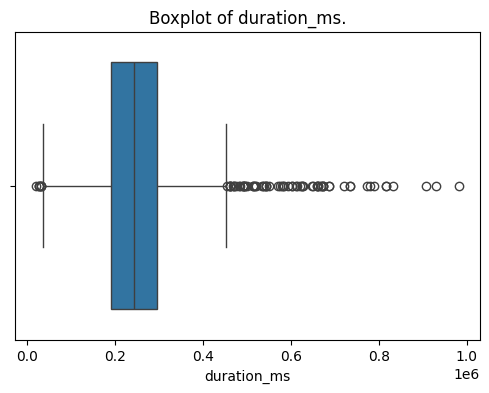

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    x = dataset[col]
    sns.boxplot(x=dataset[col])
    plt.title(f"Boxplot of {col}.")
    plt.show()

### 2. Refine Dataset

In [15]:
#I'm going to delete unnecessary columns and create a new dataframe.
dataset.drop(['Unnamed: 0','id','uri'],axis=1,inplace=True)

### 3. Perform exploratory data analysis and feature engineering

#### 3.1 Identify two popular albums

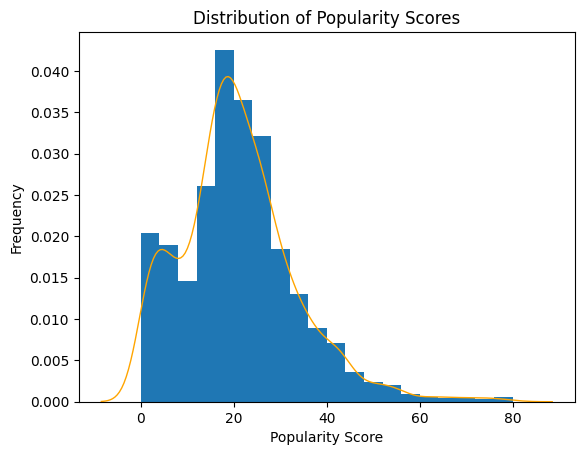

In [16]:
plt.hist(dataset['popularity'], bins=20, density=True)
sns.kdeplot(dataset['popularity'], color='orange', linewidth=1)
plt.title("Distribution of Popularity Scores")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.show()

In [17]:
popularity_thres = 40

In [18]:
popular_songs = dataset[dataset['popularity'] >= popularity_thres]

In [19]:
popular_albums = popular_songs.groupby('album').size().reset_index(name="Popular Songs")

In [20]:
top_2_albums = popular_albums.sort_values(by="Popular Songs",ascending=False).head(2)

In [21]:
colors = ['gold' if album in top_2_albums.values else 'royalblue' for album in popular_albums['album']]

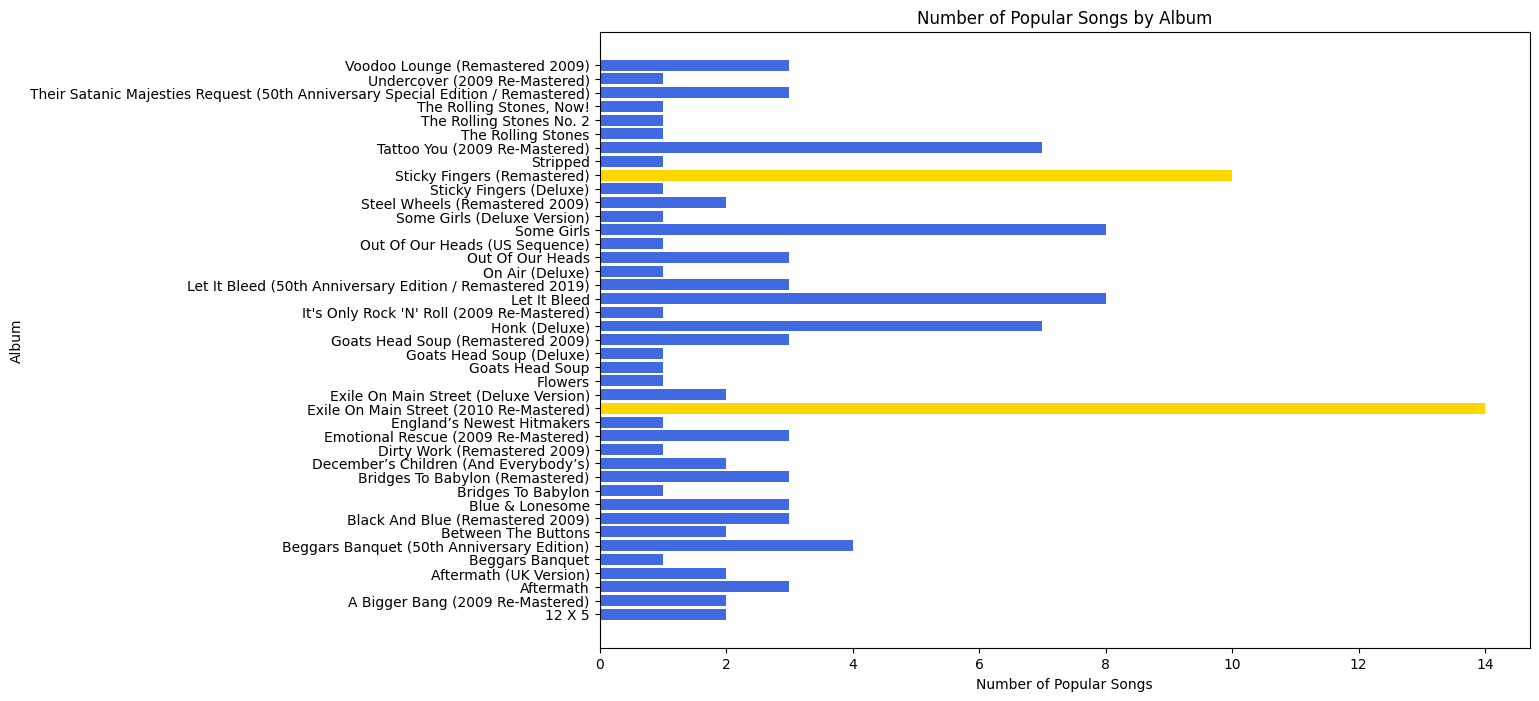

In [22]:
plt.figure(figsize=(12, 8))
plt.barh(popular_albums['album'], popular_albums['Popular Songs'], color=colors)
plt.xlabel('Number of Popular Songs')
plt.ylabel('Album')
plt.title('Number of Popular Songs by Album')
plt.show()

#### 3.2 Exploratory Data Analysis

#### Check distribution of all numeric data

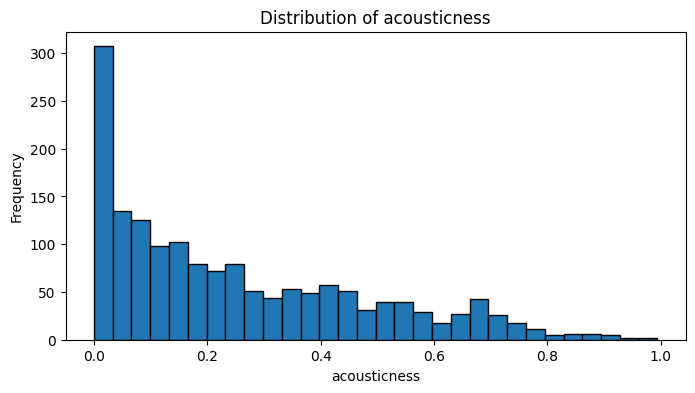

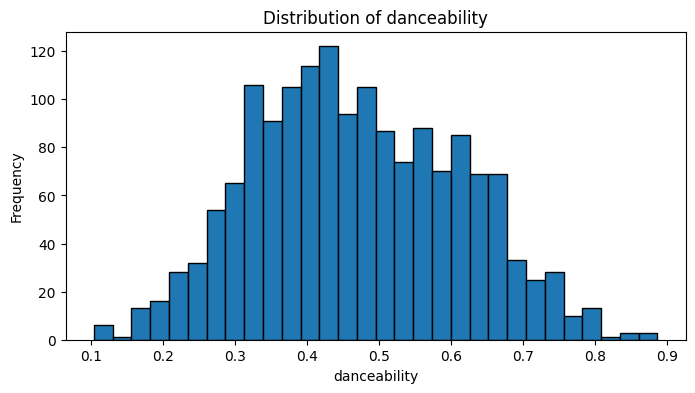

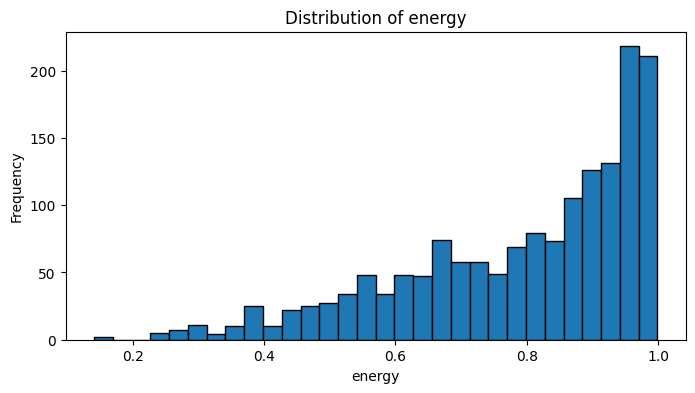

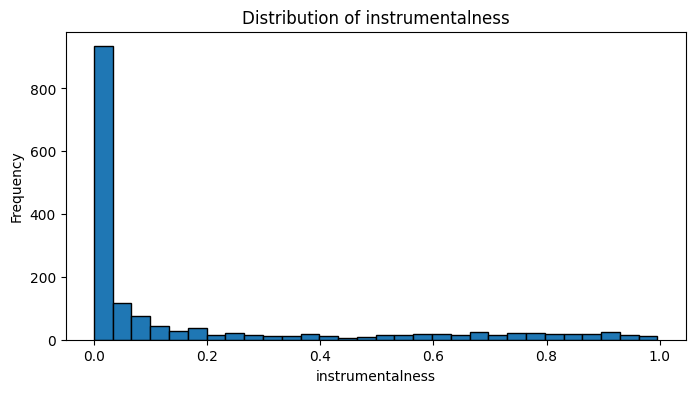

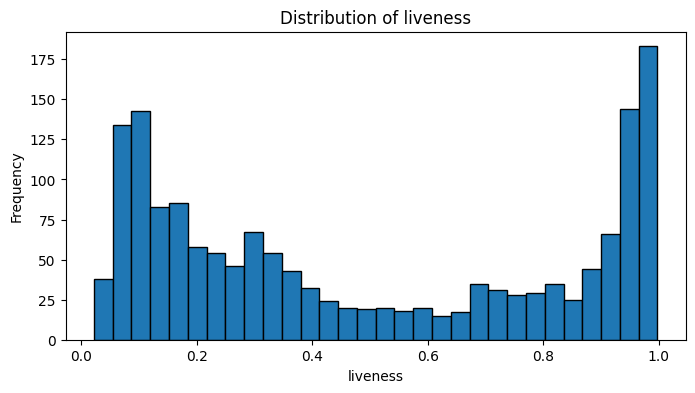

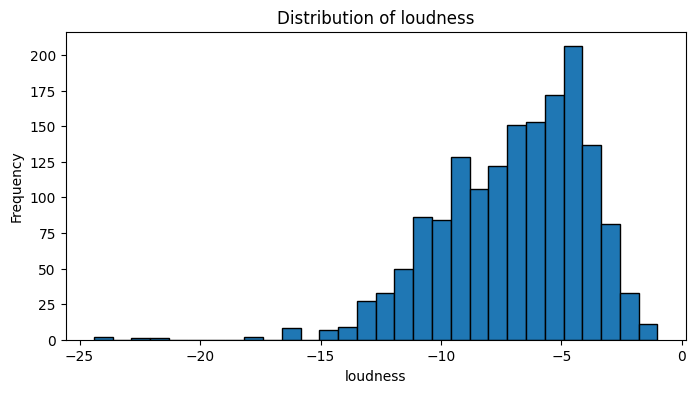

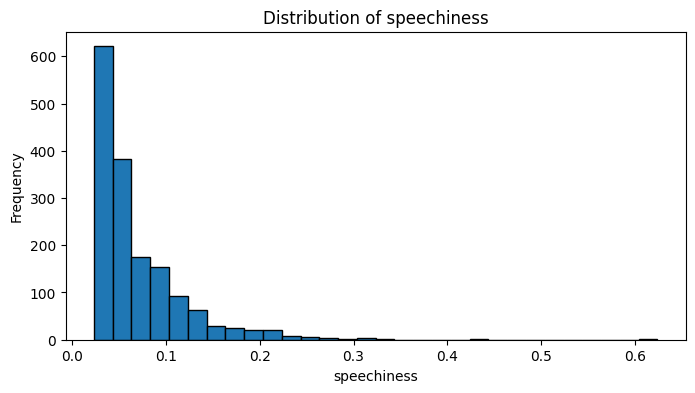

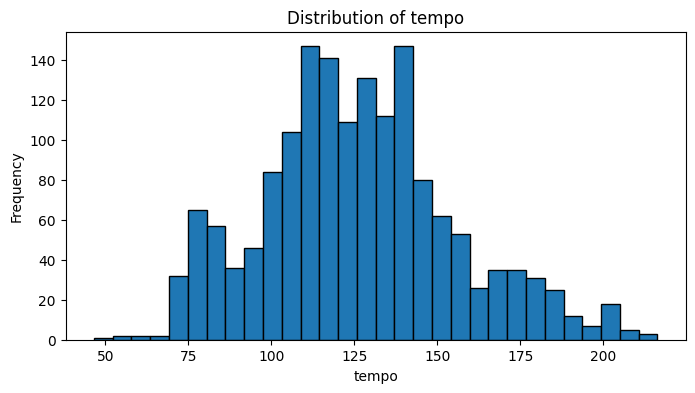

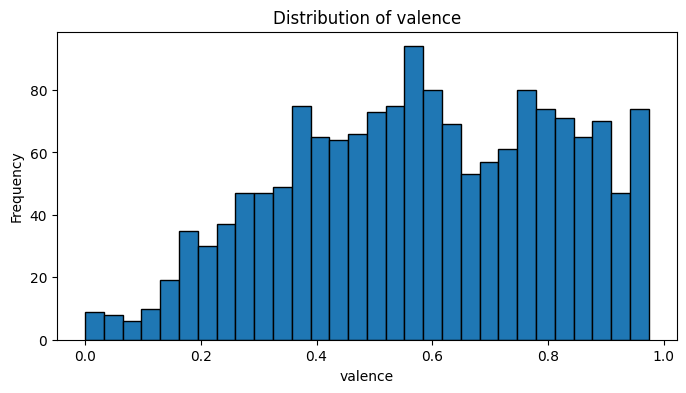

In [23]:
# Plot histogram for each numerical feature
numerical_features = ['acousticness','danceability', 'energy', 'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo', 'valence']  # Replace with your actual feature names
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.hist(dataset[feature], bins=30, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

#### Create a pair plot

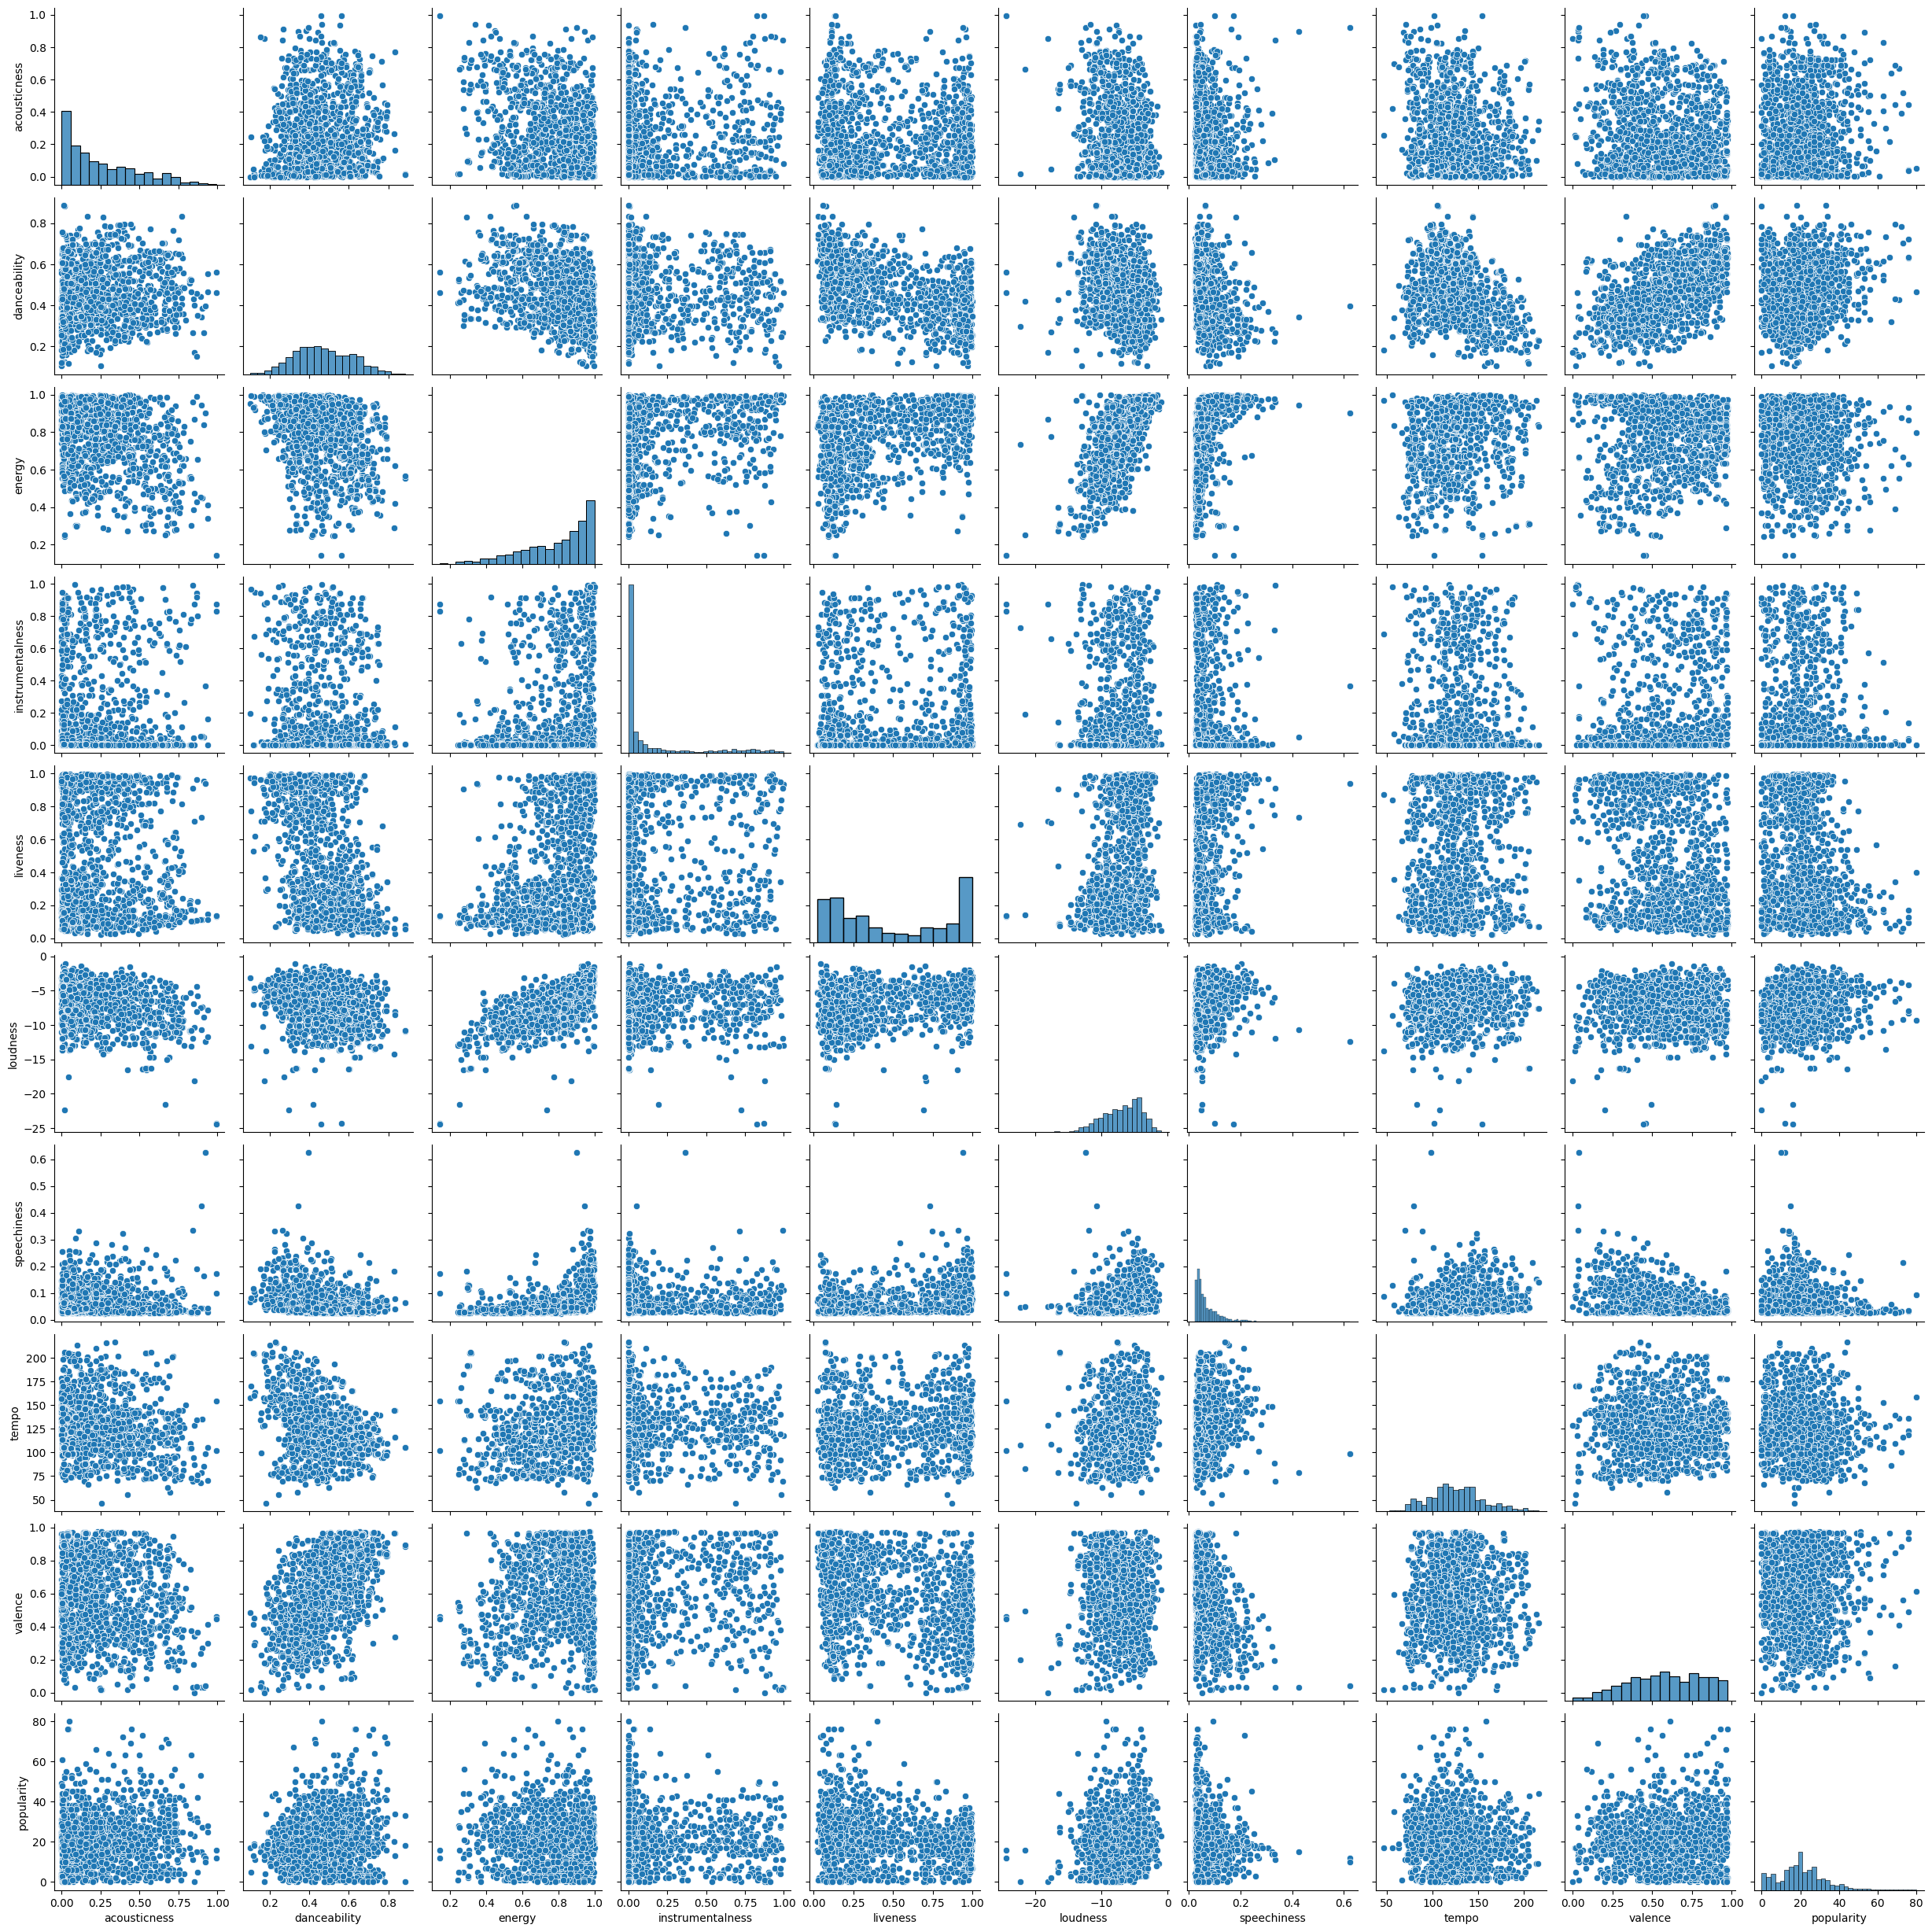

In [24]:
selected_features = ['acousticness','danceability', 'energy', 'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo', 'valence', 'popularity']
sns.pairplot(dataset[selected_features])
plt.show()

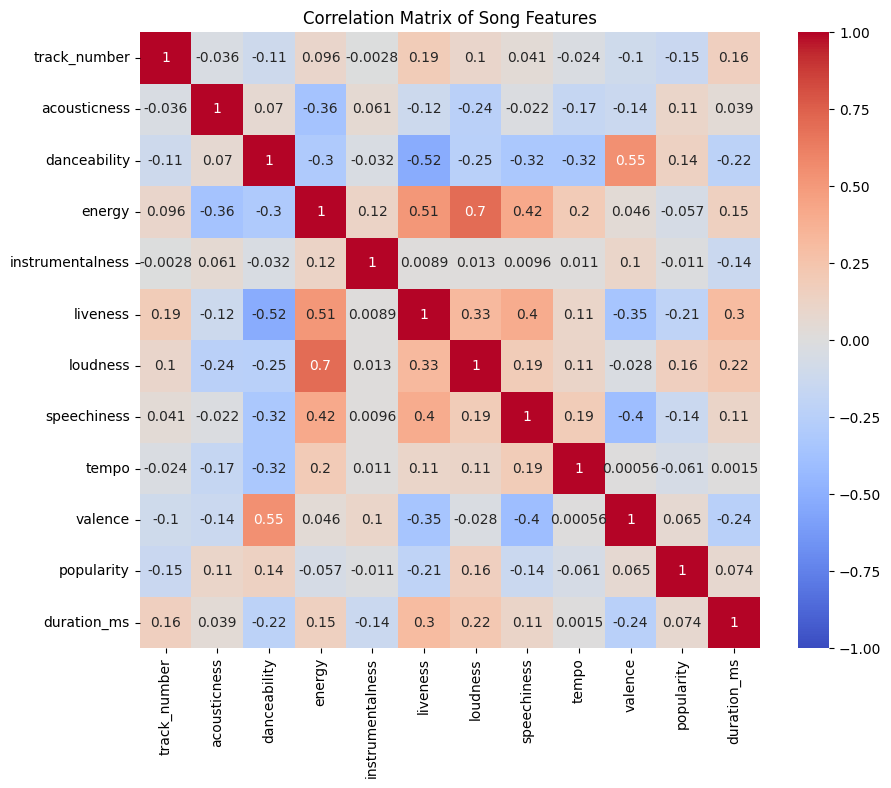

In [25]:
correlation_matrix = dataset.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Song Features')
plt.show()

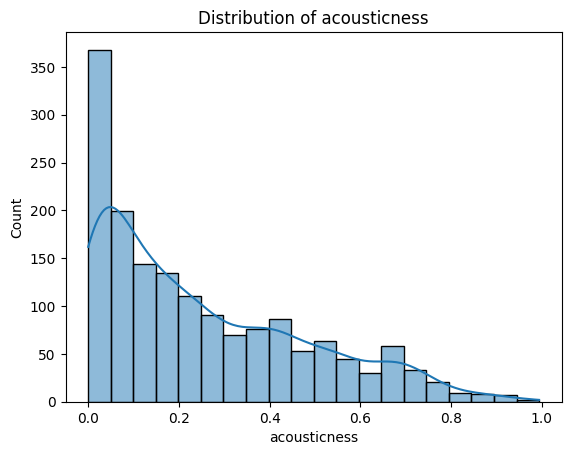

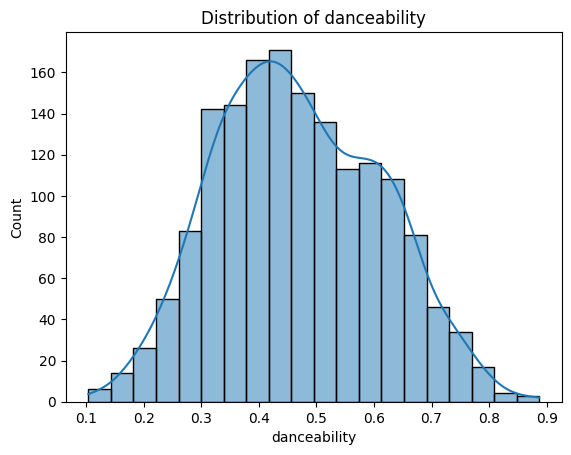

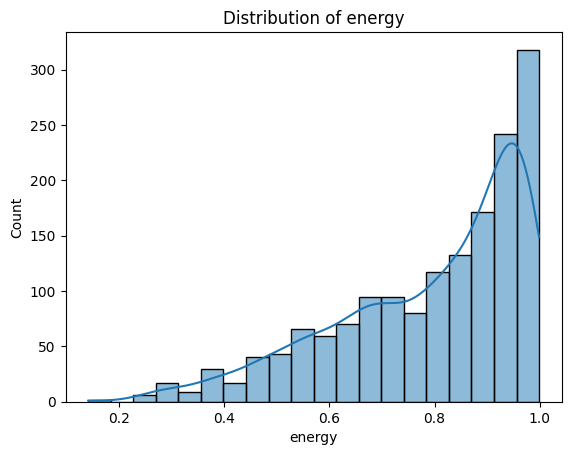

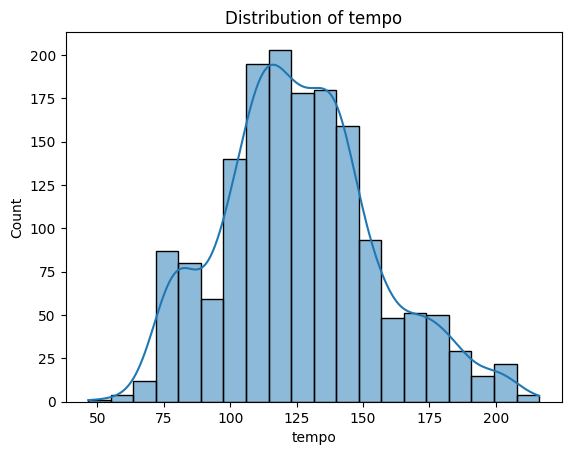

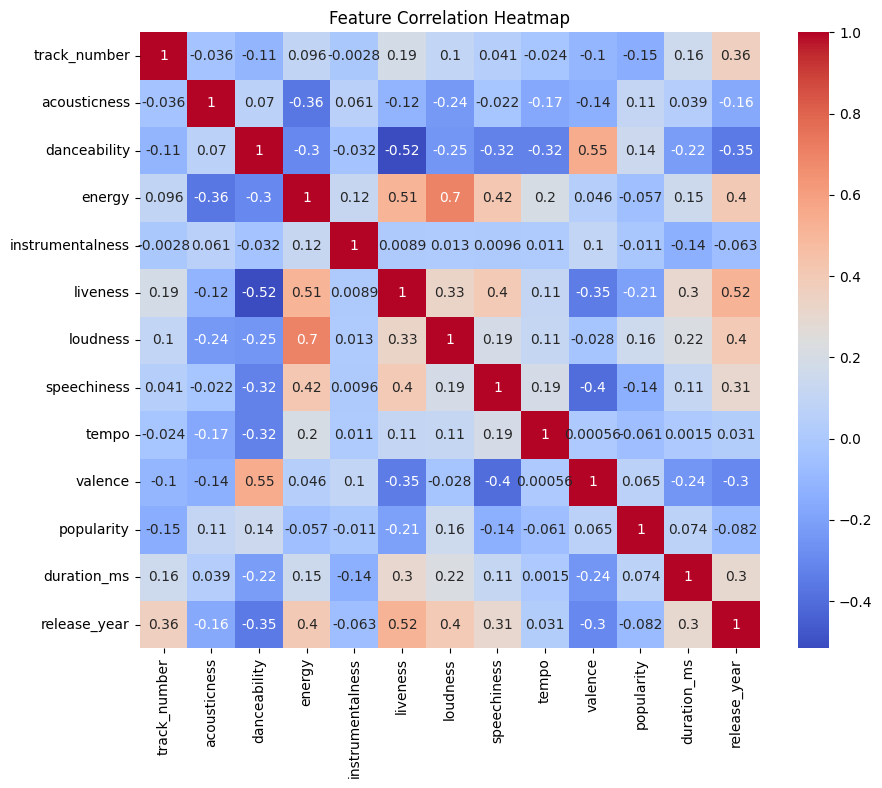

In [29]:
# Check the distribution of numerical features
dataset.describe()

# Visualize distributions
for column in ['acousticness', 'danceability', 'energy', 'tempo']:
    sns.histplot(dataset[column], kde=True, bins=20)
    plt.title(f"Distribution of {column}")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


#### 3.3 Popularity Analysis

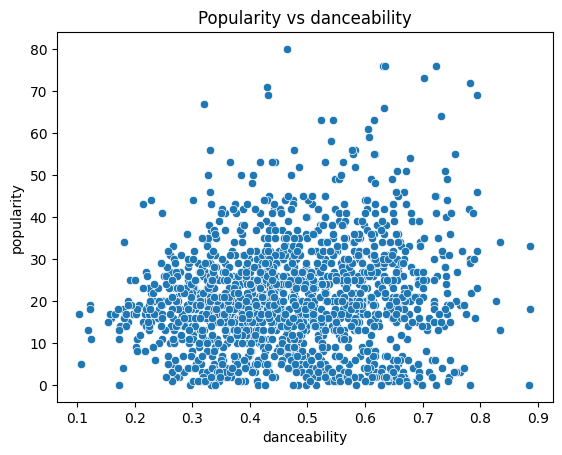

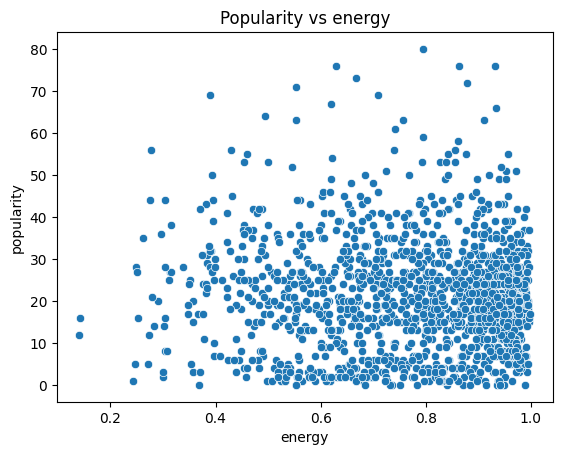

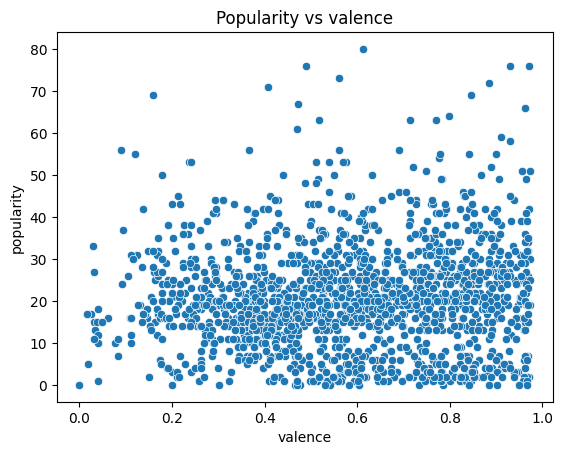

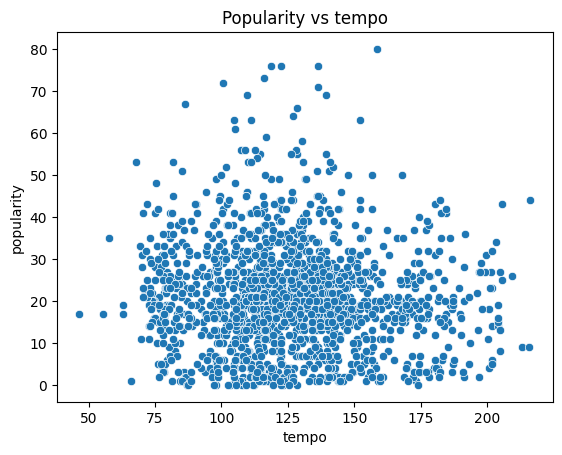

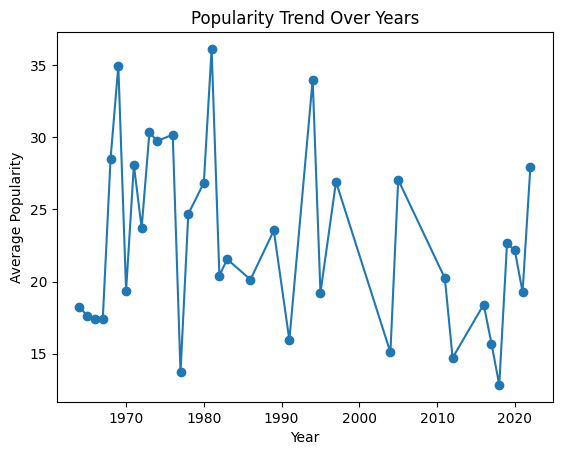

In [30]:
# Relationship between popularity and other features
for column in ['danceability', 'energy', 'valence', 'tempo']:
    sns.scatterplot(x=dataset[column], y=dataset['popularity'])
    plt.title(f"Popularity vs {column}")
    plt.show()

# Popularity over time (if release_date is present)
dataset['release_year'] = pd.to_datetime(dataset['release_date']).dt.year
yearly_popularity = dataset.groupby('release_year')['popularity'].mean().reset_index()

plt.plot(yearly_popularity['release_year'], yearly_popularity['popularity'], marker='o')
plt.title("Popularity Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.show()

#### 3.4 Dimensionality reduction

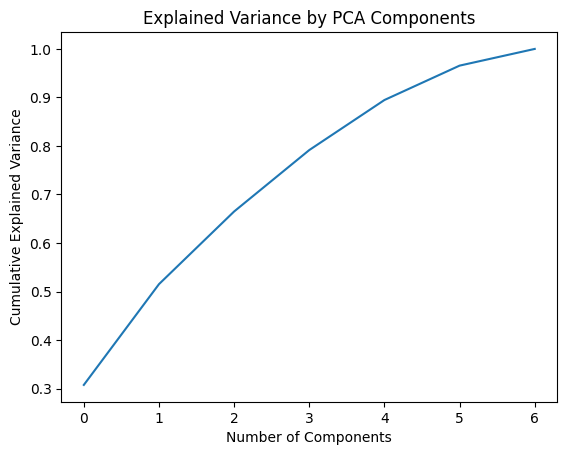

In [31]:
# Standardize features
features = ['acousticness', 'danceability', 'energy', 'tempo', 'valence', 'speechiness', 'instrumentalness']
X = dataset[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()

In [32]:
# Reduce to 4 components for clustering visualization
pca = PCA(n_components=4)
X_pca_2d = pca.fit_transform(X_scaled)

In [33]:
print("Shape of the reduced dataset:", X_pca_2d.shape)

Shape of the reduced dataset: (1610, 4)


Variance explained by each component: [0.30749642 0.20768205 0.14977201 0.12660995]


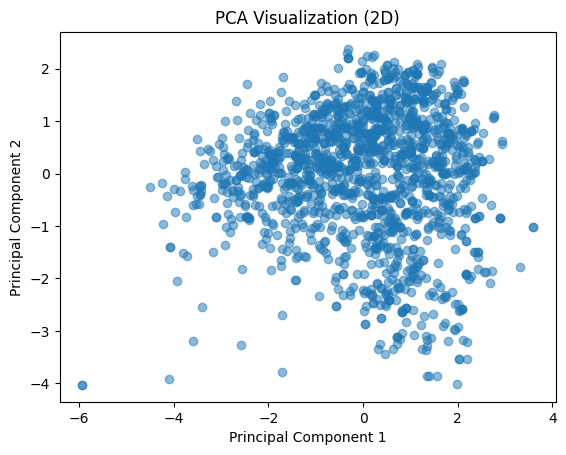

In [34]:
# Variance explained by each component
print("Variance explained by each component:", pca.explained_variance_ratio_)

# Visualize in 2D using the first two PCs
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization (2D)")
plt.show()

### 4. Perform cluster analysis

#### 4.1 Identify the right number of clusters

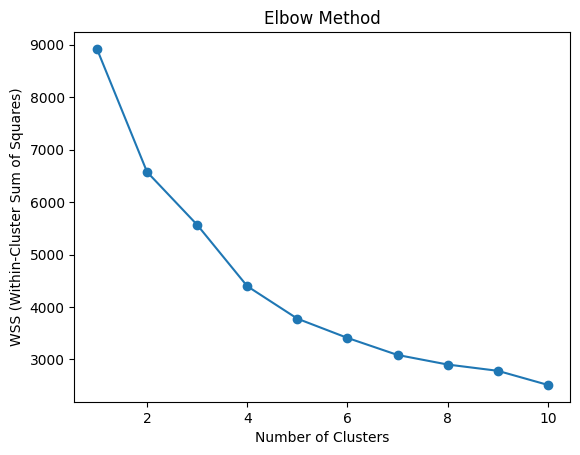

In [35]:
# Elbow Method
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca_2d)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 11), wss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method")
plt.show()

In [36]:
# Silhouette Score
for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca_2d)
    silhouette_avg = silhouette_score(X_pca_2d, cluster_labels)
    print(f"For {n_clusters} clusters, the silhouette score is {silhouette_avg}")

For 2 clusters, the silhouette score is 0.25657407921316594
For 3 clusters, the silhouette score is 0.26226739306392266
For 4 clusters, the silhouette score is 0.27272279302653607
For 5 clusters, the silhouette score is 0.2816945436784109
For 6 clusters, the silhouette score is 0.2876143118534433
For 7 clusters, the silhouette score is 0.26493256433872947


#### 4.2 Apply clustering

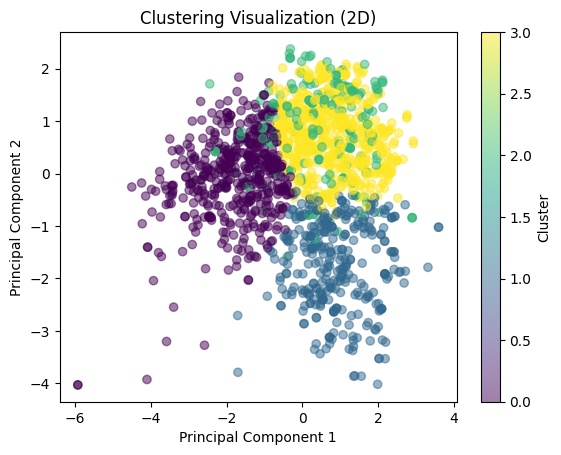

In [37]:
# Perform K-Means clustering
optimal_clusters = 4  # Replace with your chosen number
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X_pca_2d)

# Visualize clusters in 2D
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=dataset['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering Visualization (2D)")
plt.colorbar(label="Cluster")
plt.show()

#### 4.3 Define each cluster based on the features 

In [39]:
# Analyze cluster characteristics
cluster_means = dataset.groupby('Cluster')[features].mean()
print("Cluster Characteristics:\n", cluster_means)

Cluster Characteristics:
          acousticness  danceability    energy       tempo   valence  \
Cluster                                                               
0            0.170915      0.341773  0.914510  143.286297  0.415027   
1            0.505116      0.475587  0.572812  109.971167  0.431361   
2            0.273647      0.520089  0.830931  123.477144  0.753901   
3            0.166418      0.556170  0.798551  121.364200  0.751114   

         speechiness  instrumentalness  
Cluster                                 
0           0.113808          0.132278  
1           0.046446          0.067884  
2           0.053841          0.727059  
3           0.050055          0.050326  


##### 1. Cluster 0 is of High-Energy Non-Danceable Tracks
##### 2. Cluster 1 is of Acoustic and Mellow Tracks
##### 3. Cluster 2 is of Instrumental Happy Dance Tracks
##### 4. Cluster 3 is of Vocal Happy Dance Tracks

In [40]:
# Assign labels to clusters
cluster_labels = {
    0: "High-Energy Non-Danceable Tracks",
    1: "Acoustic and Mellow Tracks",
    2: "Instrumental Happy Dance Tracks",
    3: "Vocal Happy Dance Tracks"
}

# Add labels to your dataset
dataset['Cluster_Label'] = dataset['Cluster'].map(cluster_labels)

### Additional, a recommend for songs

In [41]:
# Example: Recommend songs from Cluster 3
recommended_songs = dataset[dataset['Cluster_Label'] == "Vocal Happy Dance Tracks"]
print("Recommended Songs:\n", recommended_songs[['name', 'Cluster_Label']].head())

Recommended Songs:
                                               name             Cluster_Label
15               Can't You Hear Me Knocking - Live  Vocal Happy Dance Tracks
23  Honky Tonk Women - Live At The El Mocambo 1977  Vocal Happy Dance Tracks
25      Hand Of Fate - Live At The El Mocambo 1977  Vocal Happy Dance Tracks
26          Route 66 - Live At The El Mocambo 1977  Vocal Happy Dance Tracks
28        Crazy Mama - Live At The El Mocambo 1977  Vocal Happy Dance Tracks
